### Import models and load data

In [1]:
import torch
torch.manual_seed(1234)

from importlib import reload
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import sys

mini_batch_size = 250
nb_runs = 10

### 1channel2images

In [2]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _1channel2images
reload(_1channel2images)
from _1channel2images import *
print("Working with 1channel2images framework, nb_classes = ", nb_classes)

Working with 1channel2images framework, nb_classes =  10


phase: train, epoch: 100, loss: 0.06087, acc: 1.0000
phase: val, epoch: 100, loss: 0.05980, acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06371, acc: 1.0000
phase: val, epoch: 100, loss: 0.06256, acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.07081, acc: 1.0000
phase: val, epoch: 100, loss: 0.06947, acc: 1.0000
Training complete in 0 min 11 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.07558, acc: 1.0000
phase: val, epoch: 100, loss: 0.07410, acc: 1.0000
Training complete in 0 min 9 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06801, acc: 1.0000
phase: val, epoch: 100, loss: 0.06668, acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06748, acc: 1.0000
phase: val, epoch: 100, loss: 0.06613, acc: 1.0000
Training complete in 0 min 10 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.06607, acc: 1.0000
phase: va

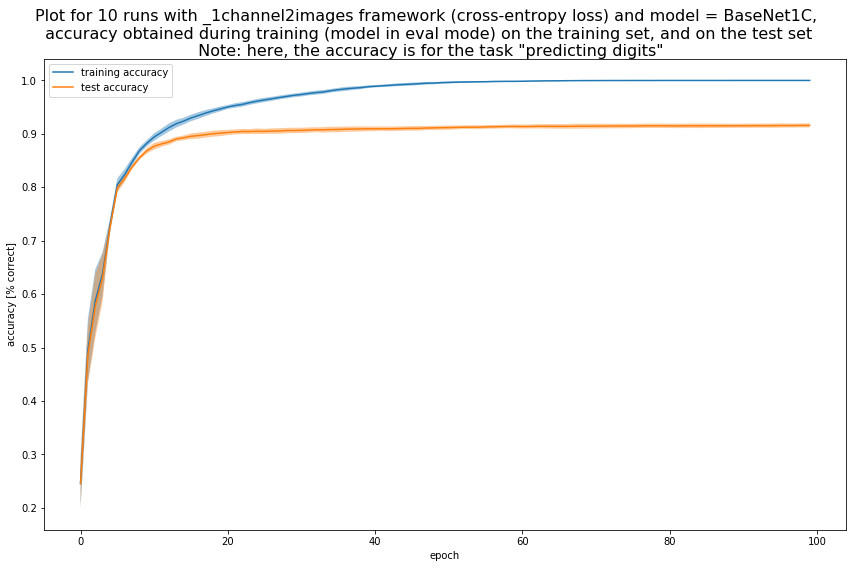

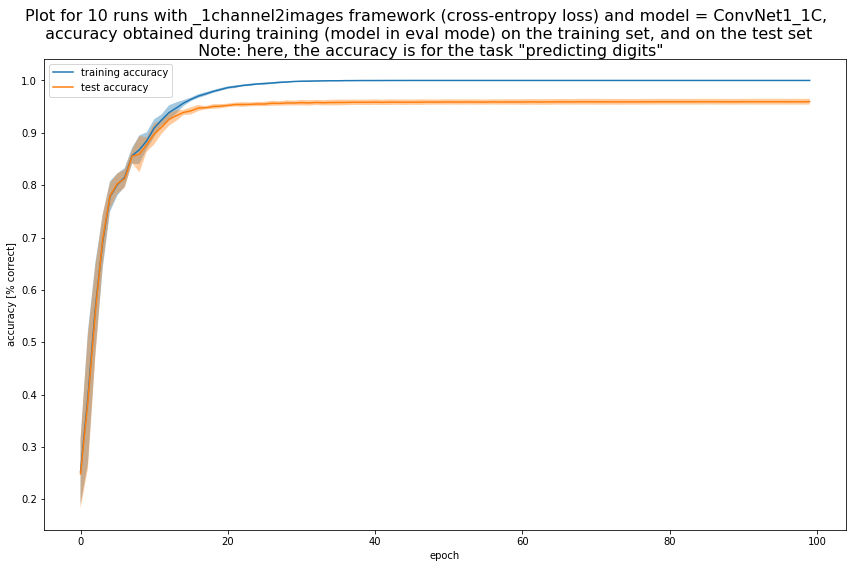

In [3]:
model1C_list = [BaseNet1C(), ConvNet1_1C()]
lr = 0.01
nb_epochs = 100
for model_1C in model1C_list:
    test_results_1C = multiple_training_runs_1C(model_1C, nb_runs, lr, mini_batch_size, nb_epochs, verbose=True)
    write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)

In [4]:
import pandas as pd
print(test_results_1C)
write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)
data = pd.read_csv('1channel2images.csv')
data.head()

(90.54346652030945, 4.567733790700149, 1.0, 0.0, 0.95745, 0.004935416226959336, 0.9706000000000001, 0.004273952113286565)
Overwriting file


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean digits accuracy (test set),Std digits accuracy,Mean accuracy (test set),Std accuracy
0,ConvNet1_1C,72226,0.01,100,90.54,1.0,0.0,0.9575,0.0049


### 2channels1image

In [7]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _2channels1image
reload(_2channels1image)
from _2channels1image import *
import test
reload(test)
from test import *
print("Working with 2channels1image framework, nb_classes = ", nb_classes)

Working with 2channels1image framework, nb_classes =  1


Training complete in 0 min 4 s
Best val acc: 1.0000
Training complete in 0 min 4 s
Best val acc: 1.0000
Training complete in 0 min 5 s
Best val acc: 1.0000
Training complete in 0 min 6 s
Best val acc: 1.0000
Training complete in 0 min 6 s
Best val acc: 1.0000
Training complete in 0 min 6 s
Best val acc: 1.0000
Training complete in 0 min 6 s
Best val acc: 1.0000
Training complete in 0 min 6 s
Best val acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
Training complete in 0 min 8 s
Best val acc: 1.0000
For model BaseNet2C, test_acc = 0.7983000000000001
Training complete in 1 min 40 s
Best val acc: 1.0000
Training complete in 1 min 46 s
Best val acc: 1.0000
Training complete in 1 min 40 s
Best val acc: 1.0000
Training complete in 1 min 34 s
Best val acc: 1.0000
Training complete in 1 min 33 s
Best val acc: 1.0000
Training complete in 1 min 32 s
Best val acc: 1.0000
Training complete in 1 min 35 s
Best val acc: 1.0000
Training complete in 2 min 6 s
Best val acc: 1.0000
Traini

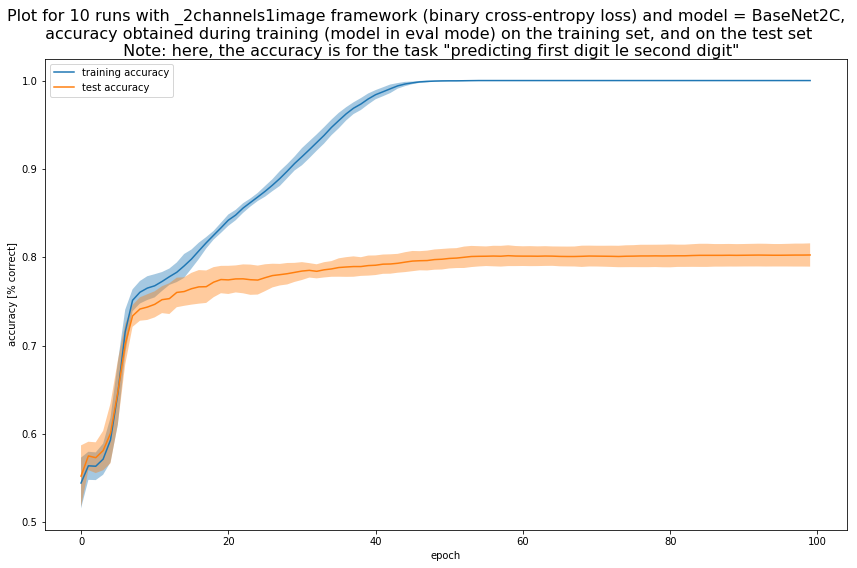

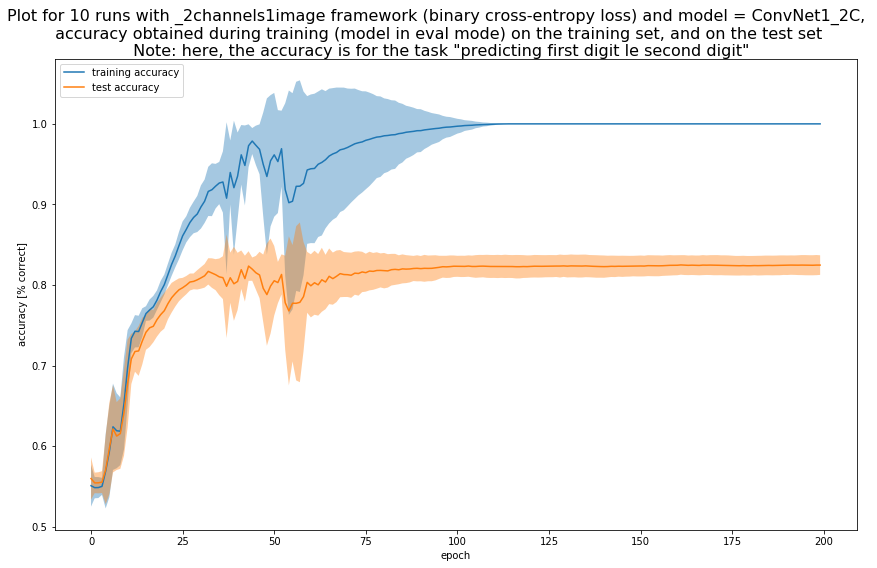

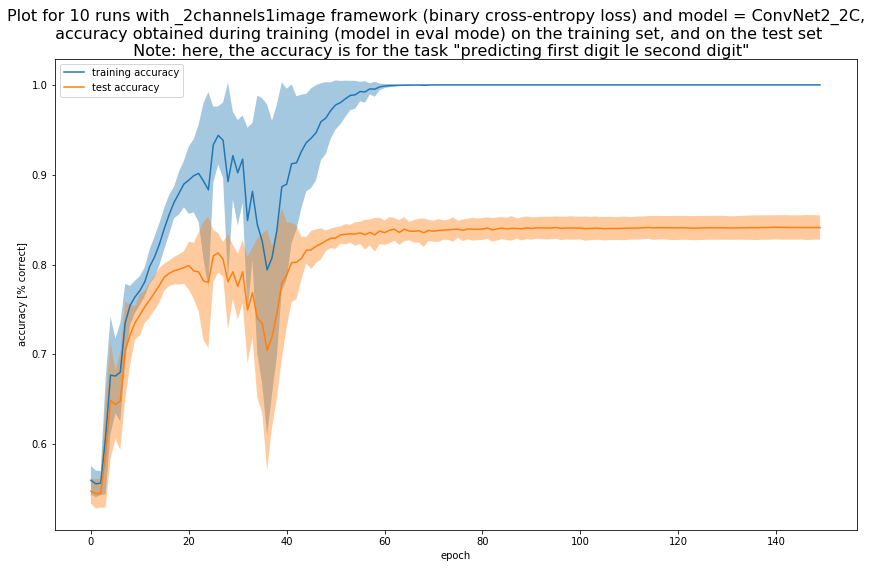

In [8]:
model2C_list = [BaseNet2C(), ConvNet1_2C(), ConvNet2_2C()]
nb_epochs_list = [100, 200, 150]
for (nb_epochs, model_2C) in zip(nb_epochs_list, model2C_list):
    test_results_2C = multiple_training_runs_fn(model_2C, train_model_2C, test_model_2C, title_2C, nb_runs, lr, 
                                                mini_batch_size, nb_epochs, verbose=False)
    write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)
    print("For model {}, test_acc = {}".format(model_2C.name, test_results_2C[4]))

In [9]:
print(test_results_2C)
write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)
data = pd.read_csv('2channels1image.csv')
data.head()

(182.36672840118408, 31.091384327804672, 1.0, 0.0, 0.8363999999999999, 0.012747112962898271)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,BaseNet2C,119001,0.01,100,5.84,1.0,0.0,0.7983,0.0117
1,ConvNet1_2C,70705,0.01,200,99.83,1.0,0.0,0.8264,0.0157
2,ConvNet2_2C,232145,0.01,150,182.37,1.0,0.0,0.8364,0.0127


### Weight Sharing

In [12]:
sys.path.insert(0, "weightssharingModels")
import NetSharing
reload(NetSharing)
from NetSharing import *
import weight_sharing
reload(weight_sharing)
from weight_sharing import *
print("Working with weight_sharing framework")

Working with weight_sharing framework


Training complete in 0 min 45 s
Best val acc: 1.0000
Training complete in 0 min 54 s
Best val acc: 1.0000
Training complete in 0 min 56 s
Best val acc: 1.0000
Training complete in 1 min 13 s
Best val acc: 1.0000
Training complete in 0 min 53 s
Best val acc: 1.0000
Training complete in 0 min 56 s
Best val acc: 1.0000
Training complete in 0 min 55 s
Best val acc: 1.0000
Training complete in 0 min 60 s
Best val acc: 1.0000
Training complete in 0 min 59 s
Best val acc: 1.0000
Training complete in 1 min 3 s
Best val acc: 1.0000
For model NetSharing1, test_acc = 0.8406
Training complete in 2 min 34 s
Best val acc: 1.0000
Training complete in 2 min 46 s
Best val acc: 1.0000
Training complete in 2 min 47 s
Best val acc: 1.0000
Training complete in 2 min 34 s
Best val acc: 1.0000
Training complete in 2 min 31 s
Best val acc: 1.0000
Training complete in 2 min 34 s
Best val acc: 1.0000
Training complete in 3 min 8 s
Best val acc: 1.0000
Training complete in 2 min 37 s
Best val acc: 1.0000
Trainin

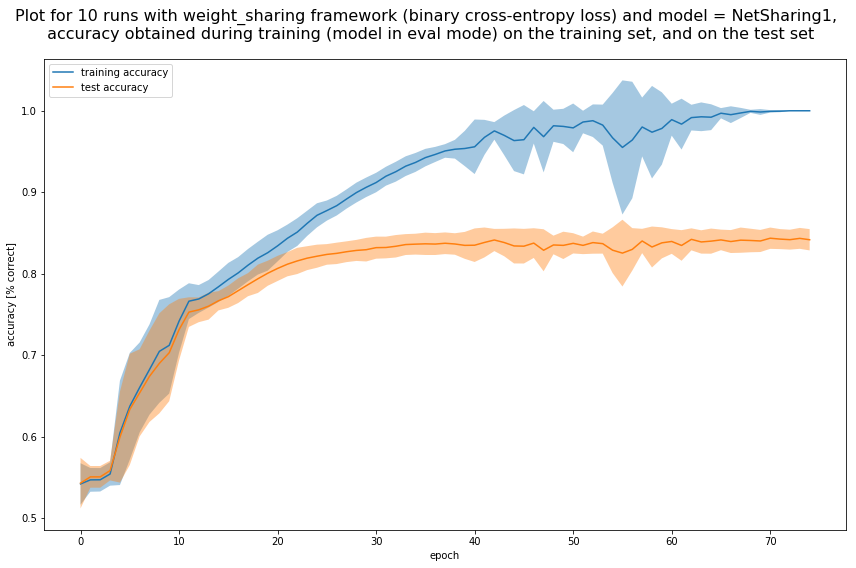

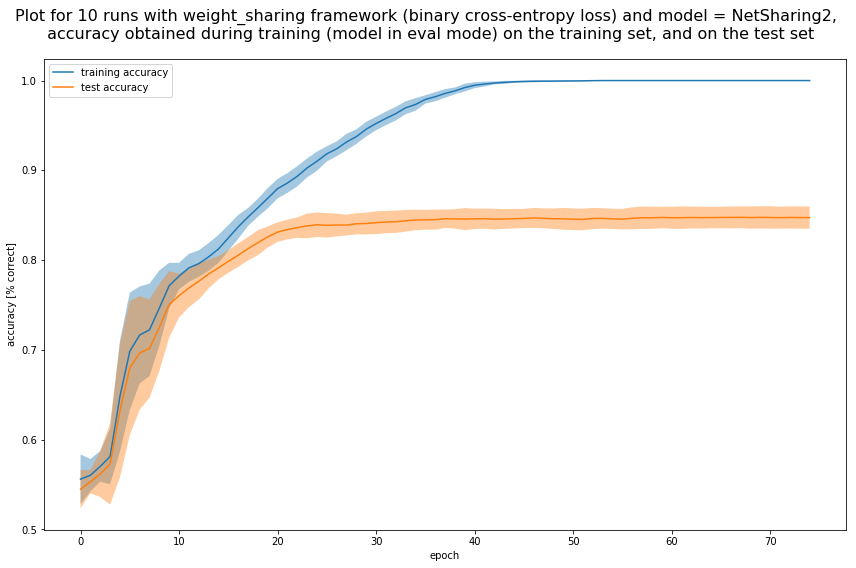

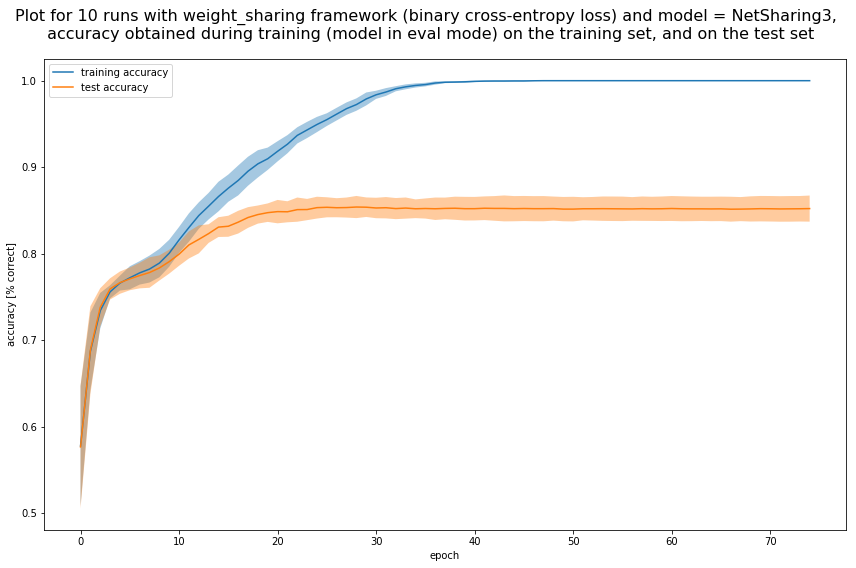

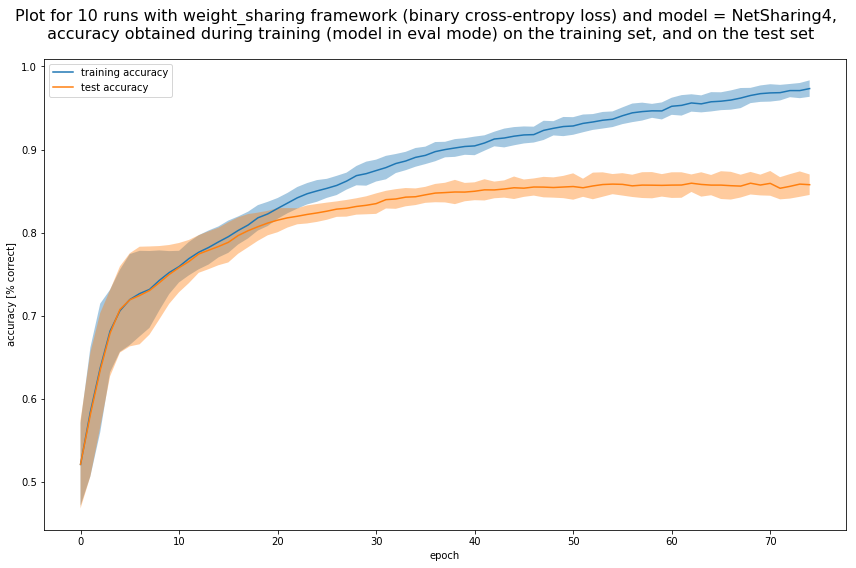

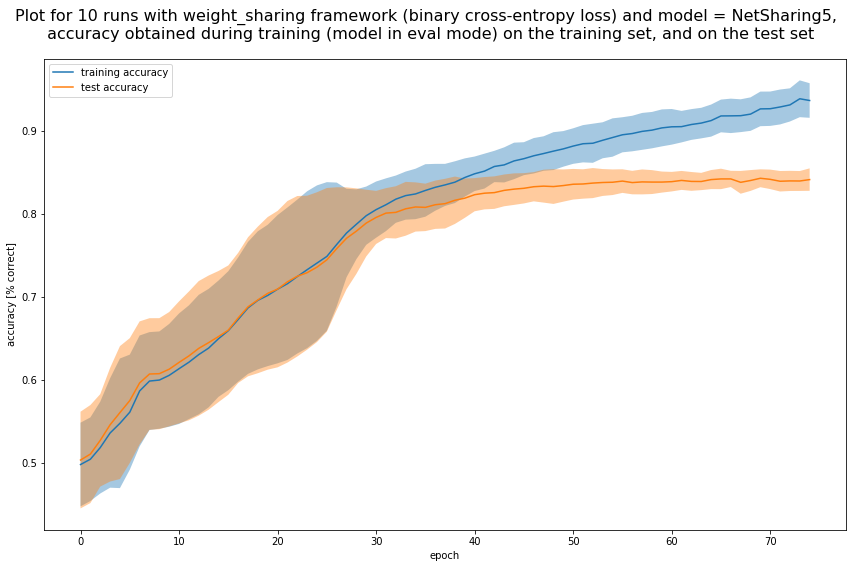

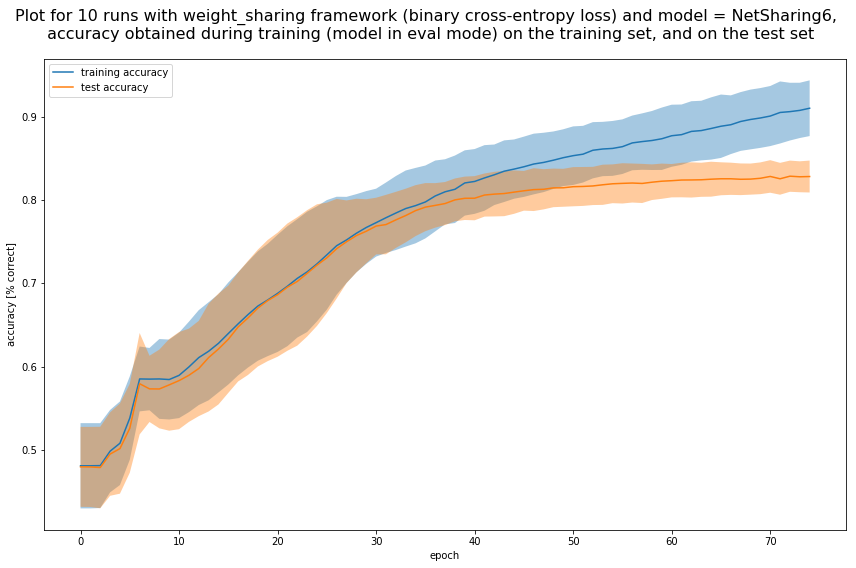

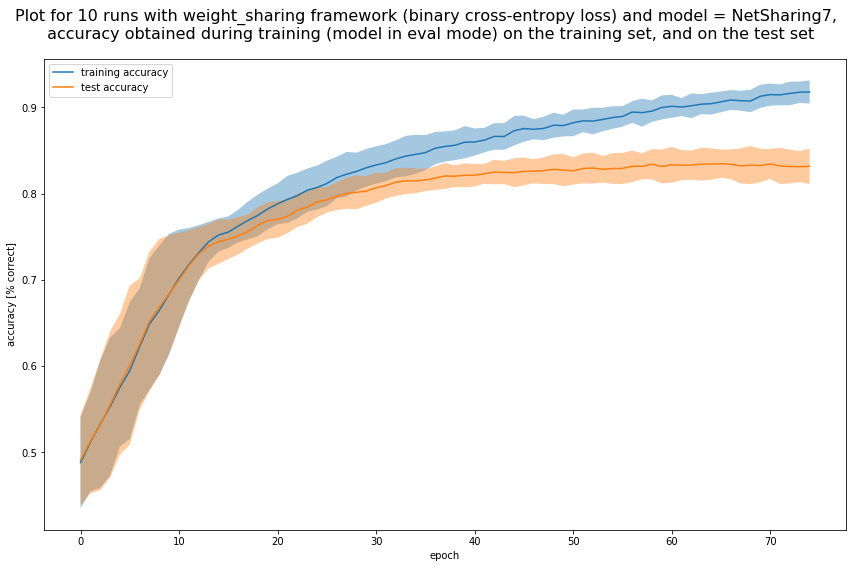

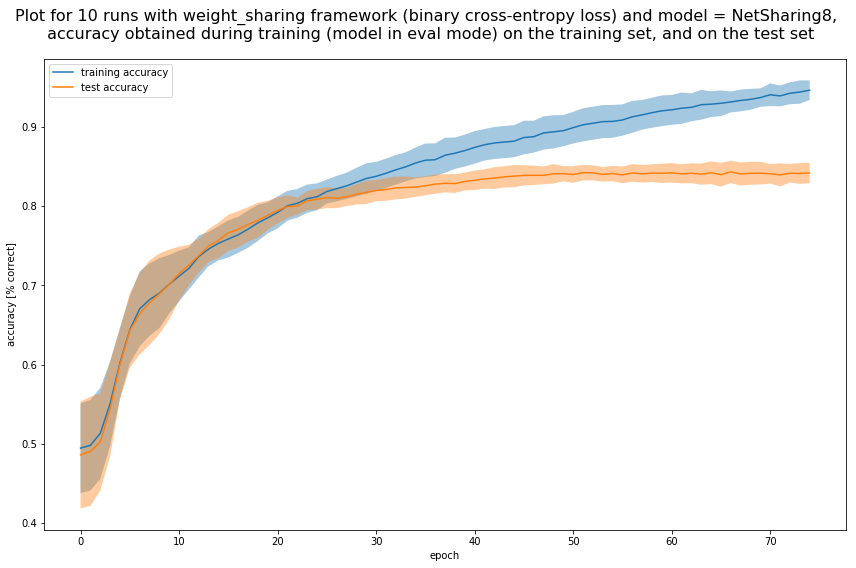

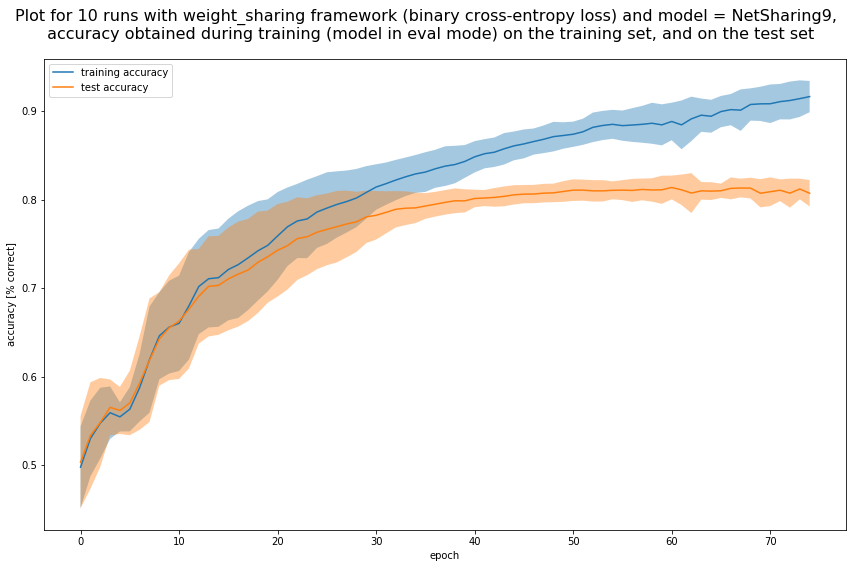

In [13]:
modelws_list = [NetSharing1(), NetSharing2(), NetSharing3(), NetSharing4(), NetSharing5(), NetSharing6(),
               NetSharing7(), NetSharing8(), NetSharing9()]
nb_epochs = 75
for model_ws in modelws_list:
    test_results_ws = multiple_training_runs_fn(model_ws, train_model_ws, test_model_ws, title_ws, nb_runs, lr, 
                                                 mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
    print("For model {}, test_acc = {}".format(model_ws.name, test_results_ws[4]))

In [14]:
import pandas as pd
print(test_results_ws)
write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
data = pd.read_csv('weightsharing.csv')
data.head()

(24.827316927909852, 0.9314203047315117, 0.9189999999999999, 0.017575235101952084, 0.8105, 0.011635673117138002)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,NetSharing1,44517,0.01,75,57.28,1.0000,0.0000,0.8406,0.0112
1,NetSharing2,100247,0.01,75,156.93,1.0000,0.0000,0.8456,0.0116
2,NetSharing3,125897,0.01,75,167.76,1.0000,0.0000,0.8520,0.0144
3,NetSharing4,9137,0.01,75,51.27,0.9755,0.0080,0.8570,0.0125
4,NetSharing5,1937,0.01,75,49.19,0.9410,0.0213,0.8408,0.0124


### Auxiliary Losses

In [15]:
sys.path.insert(0, "auxiliarylossesModels")
import Incept
reload(Incept)
from Incept import *
import auxiliary_losses
reload(auxiliary_losses)
from auxiliary_losses import *
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import test
reload(test)
from test import *
print("Working with auxiliary losses framework")

Working with auxiliary losses framework


Training complete in 0 min 55 s
Best val acc: 0.9700
Training complete in 0 min 59 s
Best val acc: 0.9910
Training complete in 0 min 55 s
Best val acc: 0.9880
Training complete in 1 min 1 s
Best val acc: 0.9720
Training complete in 0 min 52 s
Best val acc: 0.9960
Training complete in 1 min 1 s
Best val acc: 0.9820
Training complete in 0 min 52 s
Best val acc: 0.9640
Training complete in 0 min 47 s
Best val acc: 0.9850
Training complete in 0 min 46 s
Best val acc: 0.9920
Training complete in 0 min 47 s
Best val acc: 0.9690
For model Incept1, test_acc = 0.8527999999999999
Training complete in 2 min 42 s
Best val acc: 1.0000
Training complete in 2 min 56 s
Best val acc: 0.9960
Training complete in 3 min 15 s
Best val acc: 1.0000
Training complete in 3 min 17 s
Best val acc: 1.0000
Training complete in 2 min 35 s
Best val acc: 0.9840
Training complete in 2 min 57 s
Best val acc: 0.9960
Training complete in 2 min 43 s
Best val acc: 1.0000
Training complete in 2 min 53 s
Best val acc: 1.0000

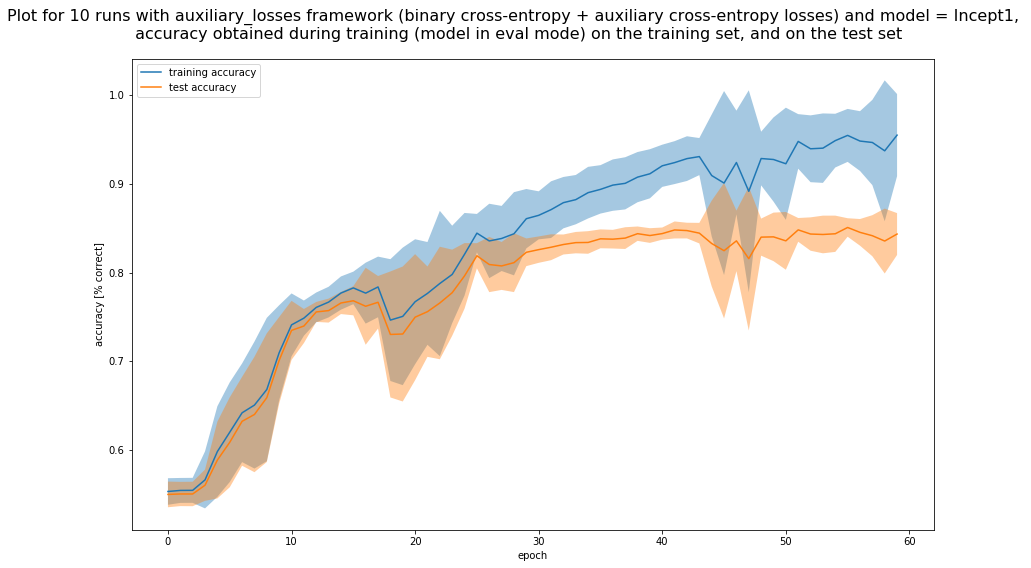

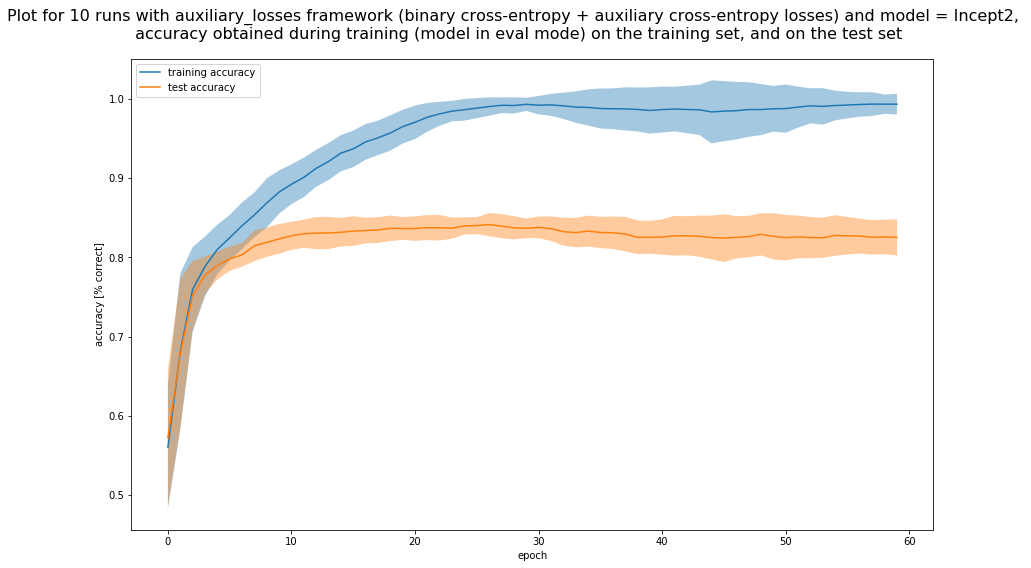

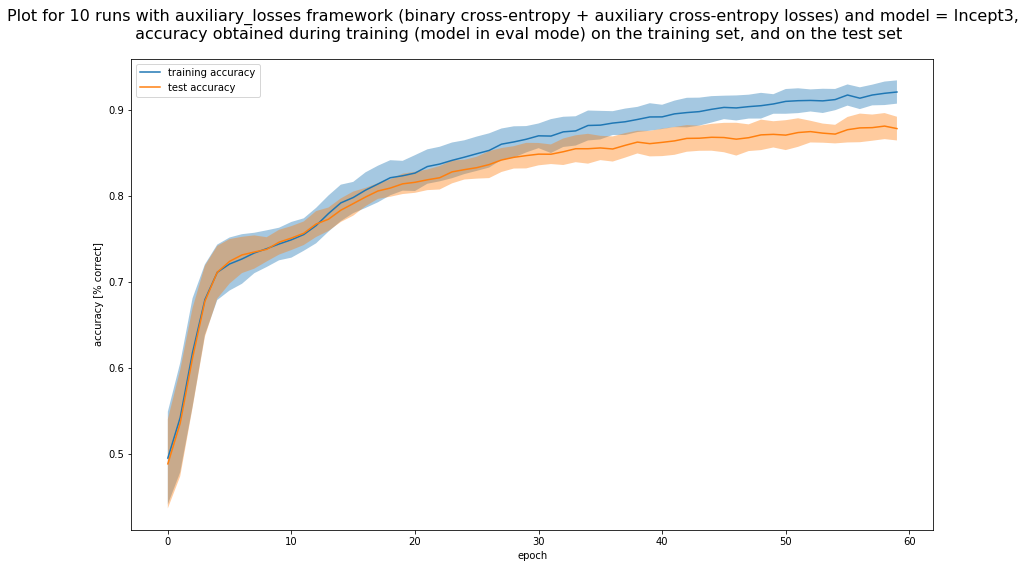

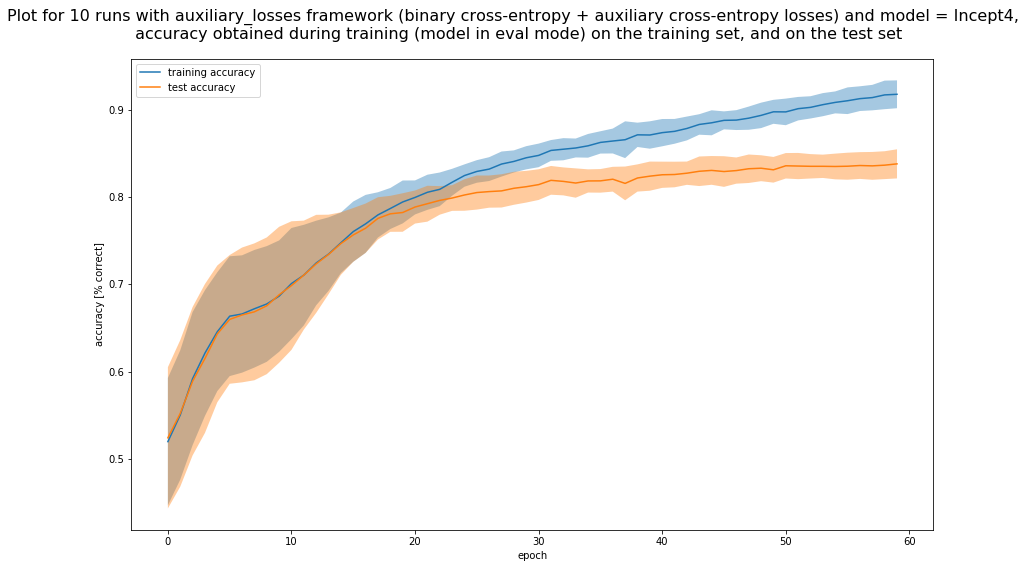

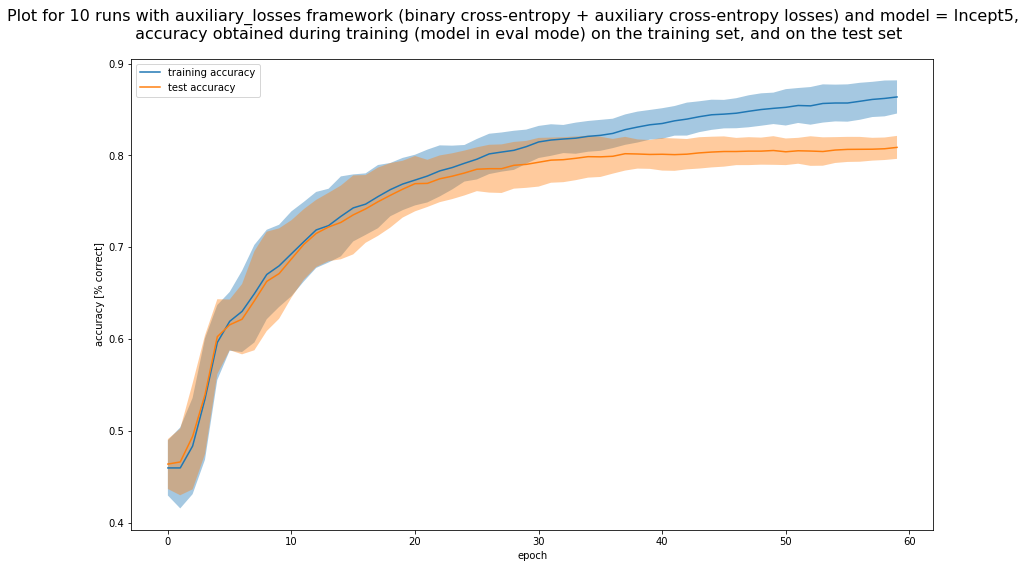

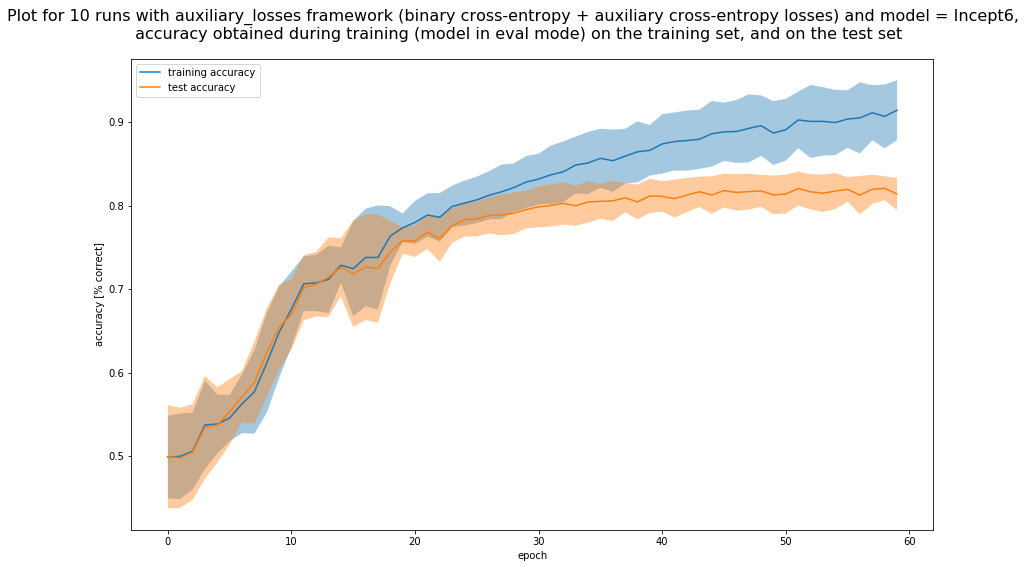

In [16]:
modelaux_list = [Incept1(), Incept2(), Incept3(), Incept4(), Incept5(), Incept6()]
nb_epochs = 60
for model_aux in modelaux_list:
    test_results_aux = multiple_training_runs_fn(model_aux, train_model_aux, test_model_aux, title_aux, nb_runs, lr,
                                                     mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
    print("For model {}, test_acc = {}".format(model_aux.name, test_results_aux[4]))

In [17]:
import pandas as pd
print(test_results_aux)
write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
data = pd.read_csv('auxiliary_losses.csv')
data.head()

(19.741118788719177, 1.9363133271159807, 0.9180999999999999, 0.03580642400463917, 0.8149999999999998, 0.017981471945681542)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,Incept1,57877,0.01,60,53.62,0.9809,0.0113,0.8528,0.0102
1,Incept2,178791,0.01,60,182.58,0.9976,0.0051,0.8368,0.0202
2,Incept3,9547,0.01,60,42.61,0.9230,0.0117,0.8802,0.0153
3,Incept4,2085,0.01,60,30.78,0.9183,0.0162,0.8386,0.0162
4,Incept5,1775,0.01,60,28.41,0.8640,0.0186,0.8077,0.0133


In [19]:
data

,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,Incept1,57877,0.01,60,53.62,0.9809,0.0113,0.8528,0.0102
1,Incept2,178791,0.01,60,182.58,0.9976,0.0051,0.8368,0.0202
2,Incept3,9547,0.01,60,42.61,0.9230,0.0117,0.8802,0.0153
3,Incept4,2085,0.01,60,30.78,0.9183,0.0162,0.8386,0.0162
4,Incept5,1775,0.01,60,28.41,0.8640,0.0186,0.8077,0.0133
5,Incept6,3341,0.01,60,19.74,0.9181,0.0358,0.8150,0.0180
